In [1]:
import pandas as pd
infile='/Users/irffanalahi/Research/Research_update/GENE/Someresults/StemGene_for_melanoma_response/melanoma_bg_all_matrix_intesectedwith_stemcell_sig_promoter.txt_ordered.txt_summary_prev_and_Em_yalefirstbatch_Response_nohealthy.txt_dict2.txt_noirf.txt'

gtfile='/Users/irffanalahi/Research/Research_update/GENE/Someresults/StemGene_for_melanoma_response/prev_and_Em_yalefirstbatch_Response_nohealthy.txt'

indf=pd.read_csv(infile,sep='\t',index_col=0)

indf.head()

,Y-3674-cfDNA.bedgraph_rolled,Y-3688-cfDNA.bedgraph_rolled,Y-3694-cfDNA.bedgraph_rolled,Y-3703-cfDNA.bedgraph_rolled,Y-3707-cfDNA.bedgraph_rolled,Y-3715-cfDNA.bedgraph_rolled,Y-3814-cfDNA.bedgraph_rolled,Y-3879-cfDNA.bedgraph_rolled,Y-3880-cfDNA.bedgraph_rolled,Y-3918-cfDNA.bedgraph_rolled,...,tot-YUMARS_15-3443-cfDNA.bedgraph_rolled,tot-YUMICRO_20-4006-cfDNA.bedgraph_rolled,tot-YUMOTE_17-3755-cfDNA.bedgraph_rolled,tot-YUPRAF_19-3925-cfDNA.bedgraph_rolled,tot-YUREIL_17-3713-cfDNA.bedgraph_rolled,tot-YUSTRAW_20-4002-cfDNA.bedgraph_rolled,tot-YUTAUR_19-3926-cfDNA.bedgraph_rolled,tot-YUTHEA_20-4000-cfDNA.bedgraph_rolled,tot-YUVIRTUE_20-4029-cfDNA.bedgraph_rolled,y4-YUEVRY_19_3935-cfDNA.bedgraph_rolled
Gene,,,,,,,,,,,,,,,,,,,,,
AARD,1.000000,0.379462,0.388071,0.640000,1.000000,0.40275,0.410167,0.594857,0.75000,0.750000,...,0.403857,0.393786,0.539071,0.400571,0.465429,0.409643,0.494286,0.395214,0.383929,0.248417
AATF,0.045455,0.057000,0.031250,0.035714,0.166643,0.00000,0.047286,0.166667,0.04668,0.000000,...,0.013317,0.009727,0.020821,0.023950,0.019983,0.015217,0.021610,0.032000,0.022147,0.000000
ABCA7,0.244882,0.446909,0.317579,0.428571,NaN,0.50000,0.900000,0.444444,0.50000,0.083333,...,0.250612,0.316861,0.335375,0.210510,0.240635,0.228800,0.280980,0.294717,0.212531,0.507375
ACKR1,0.156333,0.338000,0.441400,0.583857,0.666667,0.66700,0.544000,0.321429,NaN,0.400000,...,0.361100,0.285800,0.521200,0.417300,0.289400,0.323500,0.545100,0.299400,0.297600,0.271250
ACTB,NaN,NaN,0.083312,NaN,0.000000,0.20000,0.055500,0.000000,NaN,NaN,...,0.095625,0.018721,0.079388,0.039500,0.017368,0.079643,0.083619,0.054945,0.032559,0.083333


In [2]:
indfmean=(indf.mean()).to_frame()
indfmean.reset_index(inplace=True)
indfmean.rename(columns={'index':'Mixture',0:'Stemcell.Sig'},inplace=True)
indfmean.head()

,Mixture,Stemcell.Sig
0,Y-3674-cfDNA.bedgraph_rolled,0.436141
1,Y-3688-cfDNA.bedgraph_rolled,0.451881
2,Y-3694-cfDNA.bedgraph_rolled,0.408827
3,Y-3703-cfDNA.bedgraph_rolled,0.475607
4,Y-3707-cfDNA.bedgraph_rolled,0.444227


In [3]:
indfmean['Mixture']=indfmean["Mixture"].str.replace(".bedgraph_rolled","")
indfmean.head()

,Mixture,Stemcell.Sig
0,Y-3674-cfDNA,0.436141
1,Y-3688-cfDNA,0.451881
2,Y-3694-cfDNA,0.408827
3,Y-3703-cfDNA,0.475607
4,Y-3707-cfDNA,0.444227


In [4]:
gtdf=pd.read_csv(gtfile,sep='\t')
gtdf=gtdf[gtdf['Time point']=='PreTx']
gtdf.shape

(46, 3)

In [5]:
indfmeanMerged=indfmean.merge(gtdf,on='Mixture')
indfmeanMerged.shape

(44, 4)

In [6]:
indfmeanMerged.head()

,Mixture,Stemcell.Sig,Time point,Response
0,Y-3674-cfDNA,0.436141,PreTx,DCB
1,Y-3688-cfDNA,0.451881,PreTx,NDB
2,Y-3694-cfDNA,0.408827,PreTx,DCB
3,Y-3703-cfDNA,0.475607,PreTx,DCB
4,Y-3707-cfDNA,0.444227,PreTx,NDB


In [7]:
from scipy.stats import mannwhitneyu
mannwhitneyu(indfmeanMerged[indfmeanMerged['Response']=='DCB']['Stemcell.Sig'], indfmeanMerged[indfmeanMerged['Response']=='NDB']['Stemcell.Sig'])

MannwhitneyuResult(statistic=203.0, pvalue=0.21023835653862533)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


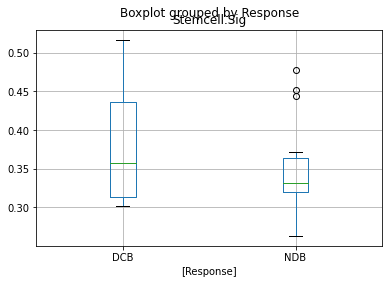

In [8]:
indfmeanMerged.boxplot(column=['Stemcell.Sig'], by=['Response'])

In [9]:
indfmeanMerged.to_csv(infile+"_patients.txt",sep='\t')